In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
#LIBRERIAS
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Sequential

In [48]:
direccion = "../content/drive/MyDrive/Img_Preprocessing_Multi_FiveClass/"

In [49]:
img_size = 224
batch_size = 32

In [50]:
train_datagen = ImageDataGenerator(
    rescale= 1.0 / 255.0,
    rotation_range=0.2,
    width_shift_range=0.05,
    height_shift_range=0.05,
    fill_mode='constant',
    validation_split=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range = 0.2
)

validation_datagen = ImageDataGenerator(
    rescale= 1.0 / 255.0,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    direccion,
    color_mode = 'rgb',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = validation_datagen.flow_from_directory(
    direccion,
    color_mode = 'rgb',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2800 images belonging to 5 classes.
Found 700 images belonging to 5 classes.


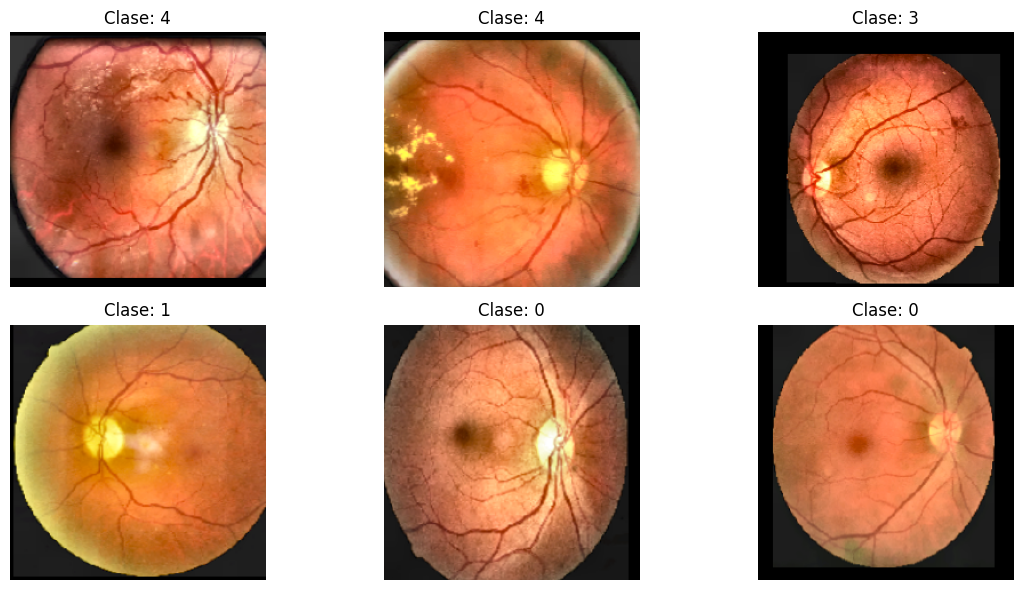

In [51]:
images, labels = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Clase: {np.argmax(labels[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [52]:
print(images[1])

[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.10902097 0.10407814 0.09499442]
  [0.10389198 0.10523863 0.09148354]
  [0.09931802 0.09921204 0.09061541]
  ...
  [0.16078432 0.16470589 0.16078432]
  [0.16078432 0.16470589 0.16078432]
  [0.16078432 0.16470589 0.16078432]]

 [[0.10738867 0.10436144 0.09436277]
  [0.10655793 0.10434998 0.09326084]


In [53]:
# class_counts = {}
# class_names = {v: k for k, v in train_generator.class_indices.items()}

# for i in range(len(train_generator)):
#     images, labels = train_generator[i]
#     for label in labels:
#         class_index = np.argmax(label)
#         class_name = class_names[class_index]
#         if class_name in class_counts:
#             class_counts[class_name] += 1
#         else:
#             class_counts[class_name] = 1

# print("Distribución de clases en entrenamiento:")
# print(class_counts)

In [54]:
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
# from tensorflow.keras.models import Model

# base_model = EfficientNetB0(
#     input_shape=(img_size, img_size, 3),
#     include_top=False,
#     weights='imagenet'
# )

In [55]:
# base_model.trainable = False

In [56]:
# x = GlobalAveragePooling2D()(base_model.output)
# x = Dense(128, activation='relu')(x)
# x = Dropout(0.5)(x)
# output = Dense(5, activation='softmax')(x)
# model = Model(inputs=base_model.input, outputs=output)

In [57]:
# model = tf.keras.models.Sequential([
#     base_model,

#     tf.keras.layers.Conv2D(
#         256, (3, 3), activation='relu',
#         kernel_initializer='he_uniform', padding='same'),

#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(2, 2),

#     tf.keras.layers.Dense(
#         128, activation='relu',
#         kernel_initializer='he_uniform'
#     ),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(2, 2),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Dense(5, activation='softmax')
# ])

In [58]:
# model = tf.keras.models.Sequential([
#     base_model,
#     layers.GlobalAveragePooling2D(),
#     layers.Dense(256, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(0.001)),
#     #layers.BatchNormalization(),
#     layers.Dropout(0.2),
#     layers.Dense(5, activation='softmax')
# ])

In [59]:
from tensorflow.keras.applications import EfficientNetB0
from keras.applications import DenseNet121

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)

outputs = layers.Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=outputs)

In [60]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_4    │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_4… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_5    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_5… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,173,957 (27.37 MB)

 Trainable params: 134,149 (524.02 KB)

 Non-trainable params: 7,039,808 (26.85 MB)

In [61]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

In [63]:
try:
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        callbacks=[lr_scheduler, early_stopping, checkpoint],
        epochs=20,
        verbose=1
    )
except KeyboardInterrupt:
    print("Entrenamiento detenido manualmente.")

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 793s 9s/step - accuracy: 0.2842 - loss: 1.9899 - val_accuracy: 0.3429 - val_loss: 1.4468 - learning_rate: 0.0010
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 368s 4s/step - accuracy: 0.3308 - loss: 1.6994 - val_accuracy: 0.3943 - val_loss: 1.3637 - learning_rate: 0.0010
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 370s 4s/step - accuracy: 0.3427 - loss: 1.5811 - val_accuracy: 0.4029 - val_loss: 1.3590 - learning_rate: 0.0010
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 368s 4s/step - accuracy: 0.3615 - loss: 1.4908 - val_accuracy: 0.4029 - val_loss: 1.3360 - learning_rate: 0.0010
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - accuracy: 0.3748 - loss: 1.4221 - val_accuracy: 0.3971 - val_loss: 1.3275 - learning_rate: 0.0010
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 370s 4s/step - accuracy: 0.3766 - loss: 1.4114 - val_accuracy: 0.4029 - val_loss: 1.3235 - learning_rate: 0.0010
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - accuracy: 0.3815 - loss: 1.3669 - val_acc

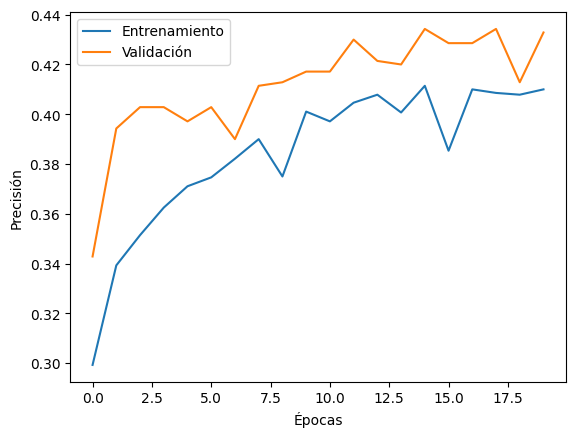

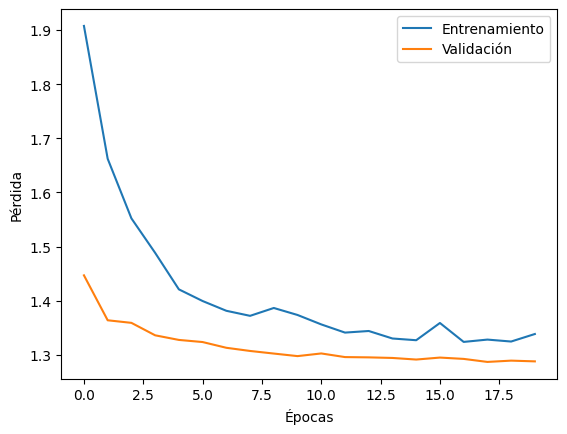

In [64]:
# Gráfica de precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Gráfica de pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [65]:
loss, accuracy = model.evaluate(val_generator)
print('Loss:', loss)
print('Accuracy:', accuracy)

22/22 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.4271 - loss: 1.2958
Loss: 1.286820650100708
Accuracy: 0.4342857003211975


In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [67]:
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_true, y_pred)
class_names = list(val_generator.class_indices.keys())

22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step


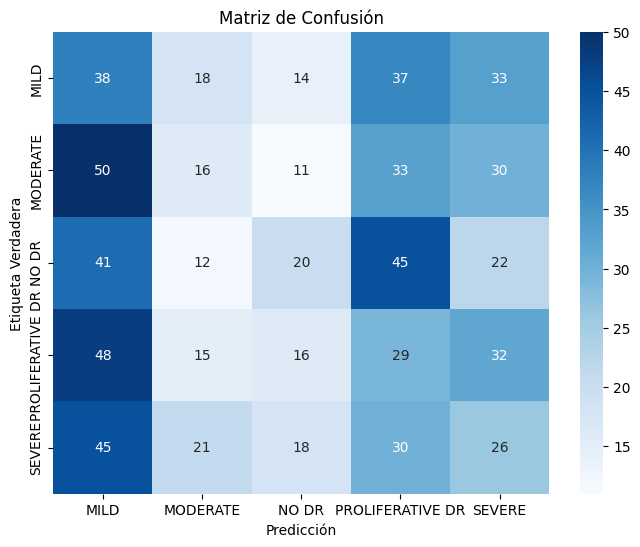

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

In [72]:
class_indices = train_generator.class_indices
print(class_names)

['MILD', 'MODERATE', 'NO DR', 'PROLIFERATIVE DR', 'SEVERE']


TIEMPO DE ENTRENAMIENTO 2HORAS